In [124]:
import pandas as pd

# Load the CSV file into a DataFrame
df_bundesliga_recencyfeatures = pd.read_csv('df_bundesliga_recencyfeatures.csv')

In [125]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [126]:
df_bundesliga_recencyfeatures['home_team'].unique()

array(['Werder Bremen', '1. FC Saarbrücken', 'TSV 1860 München',
       'Eintracht Frankfurt', 'FC Schalke 04', 'Preussen Münster',
       'Karlsruher SC', 'Hertha BSC', '1. FC Kaiserslautern',
       'Eintracht Braunschweig', 'VfB Stuttgart', 'MSV Duisburg',
       'Hamburger SV', '1. FC Nürnberg', '1. FC Köln',
       'Borussia Dortmund', 'Hannover 96', 'Borussia Neunkirchen',
       'SC Tasmania 1900 Berlin', 'Bayern München',
       'Bor. Mönchengladbach', 'Fortuna Düsseldorf', 'Rot-Weiss Essen',
       'Alemannia Aachen', 'Kickers Offenbach', 'Rot-Weiß Oberhausen',
       'Arminia Bielefeld', 'VfL Bochum', 'Wuppertaler SV',
       'Fortuna Köln', 'Tennis Borussia Berlin', 'KFC Uerdingen',
       'FC St. Pauli', 'SV Darmstadt 98', 'Bayer 04 Leverkusen',
       'SV Waldhof Mannheim', 'FC 08 Homburg', 'Blau-Weiß 90 Berlin',
       'Stuttgarter Kickers', 'SG Wattenscheid 09', 'Dynamo Dresden',
       'Hansa Rostock', 'VfB Leipzig', 'SC Freiburg', 'VfL Wolfsburg',
       'SSV Ulm 1846'

In [250]:
df_bundesliga_recencyfeatures

,Unnamed: 0,matchday,date,home_team,final_result,away_team,home_goals,away_goals,winner,goal_difference,season_start_year,year,total_goals,home_recent_goals_scored_n3,home_recent_goals_conceded_n3,away_recent_goals_scored_n3,away_recent_goals_conceded_n3,home_recent_goals_scored_n5,home_recent_goals_conceded_n5,away_recent_goals_scored_n5,away_recent_goals_conceded_n5,home_recent_goals_scored_n10,home_recent_goals_conceded_n10,away_recent_goals_scored_n10,away_recent_goals_conceded_n10,previous_win,home_team_position,away_team_position,strength_difference,month,head_to_head_home_goals_scored,head_to_head_away_goals_scored,head_to_head_home_wins,head_to_head_away_wins,head_to_head_draws,home_prev_season_goals_scored,home_prev_season_goals_conceded,away_prev_season_goals_scored,away_prev_season_goals_conceded,home_prev_season_position,away_prev_season_position,home_team_pi_rating,away_team_pi_rating,strength_of_opposition
0,0,1,1963-08-24,Werder Bremen,3-2,Borussia Dortmund,3,2,0,1,1963,1963,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,12.0,-11.0,8,5,11,1,4,0,0,0,0,0,0,0,1515.000000,1485.000000,30.000000
1,1,1,1963-08-24,1. FC Saarbrücken,0-2,1. FC Köln,0,2,2,2,1963,1963,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,2.0,1.0,8,5,15,0,5,0,0,0,0,0,0,0,1485.000000,1515.000000,-30.000000
2,2,1,1963-08-24,TSV 1860 München,1-1,Eintracht Braunschweig,1,1,1,0,1963,1963,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,4.0,-1.0,8,6,4,2,1,2,0,0,0,0,0,0,1500.000000,1500.000000,0.000000
3,3,1,1963-08-24,Eintracht Frankfurt,1-1,1. FC Kaiserslautern,1,1,1,0,1963,1963,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,6.0,-2.0,8,7,4,2,1,2,0,0,0,0,0,0,1500.000000,1500.000000,0.000000
4,4,1,1963-08-24,FC Schalke 04,2-0,VfB Stuttgart,2,0,0,2,1963,1963,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,16.0,-14.0,8,5,8,1,1,3,0,0,0,0,0,0,1515.000000,1485.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18603,18603,34,2024-05-18,1. FC Union Berlin,2-1,SC Freiburg,2,1,0,1,2023,2024,3,4.0,10.0,4.0,0.0,6.0,13.0,7.0,3.0,15.0,16.0,12.0,12.0,1,14.0,8.0,6.0,5,11,8,3,1,1,30,11,28,13,4,5,1541.141899,1565.050495,-23.908596
18604,18605,34,2024-05-18,TSG 1899 Hoffenheim,4-2,Bayern München,4,2,0,2,2023,2024,6,8.0,5.0,8.0,7.0,10.0,9.0,15.0,11.0,18.0,16.0,23.0,25.0,0,7.0,2.0,5.0,5,6,9,1,2,2,28,29,53,17,13,1,1583.130427,1745.865908,-162.735481
18605,18604,34,2024-05-18,Eintracht Frankfurt,2-2,RB Leipzig,2,2,1,0,2023,2024,4,5.0,7.0,7.0,3.0,8.0,8.0,16.0,5.0,19.0,13.0,25.0,17.0,0,6.0,4.0,2.0,5,8,4,2,1,2,35,18,38,18,7,3,1615.713454,1732.175756,-116.462301
18606,18606,34,2024-05-18,VfL Wolfsburg,1-3,1. FSV Mainz 05,1,3,2,2,2023,2024,4,5.0,3.0,2.0,2.0,8.0,9.0,4.0,12.0,13.0,16.0,7.0,18.0,0,12.0,13.0,-1.0,5,13,4,3,1,1,34,25,31,25,7,9,1539.709070,1590.355715,-50.646645


Plot graph to get an understanding of how what a typically win-,loss-, draws-streak looks like 

In [127]:
import plotly.express as px

team_streaks = {'team': [], 'streak_length': [], 'streak_type': []}

# Generate streaks for each team
for team in pd.concat([df_bundesliga_recencyfeatures['home_team'], df_bundesliga_recencyfeatures['away_team']]).unique():
    team_matches = df_bundesliga_recencyfeatures[(df_bundesliga_recencyfeatures['home_team'] == team) | (df_bundesliga_recencyfeatures['away_team'] == team)]
    team_matches = team_matches.sort_values('year')

    current_streak_type = None
    current_streak_length = 0

    for _, row in team_matches.iterrows():
        result = (
            'Win' if (row['winner'] == 0 and row['home_team'] == team) or (row['winner'] == 2 and row['away_team'] == team)
            else 'Draw' if row['winner'] == 1
            else 'Loss'
        )

        if result == current_streak_type:
            current_streak_length += 1
        else:
            if current_streak_type is not None:
                team_streaks['team'].append(team)
                team_streaks['streak_length'].append(current_streak_length)
                team_streaks['streak_type'].append(current_streak_type)

            current_streak_type = result
            current_streak_length = 1

    if current_streak_length > 0:
        team_streaks['team'].append(team)
        team_streaks['streak_length'].append(current_streak_length)
        team_streaks['streak_type'].append(current_streak_type)

streaks_df = pd.DataFrame(team_streaks)

plotly_fig = px.histogram(
    streaks_df, 
    x='streak_length', 
    color='streak_type', 
    barmode='stack',
    nbins=30,
    labels={'streak_length': 'Streak Length', 'count': 'Frequency'},
    title='Distribution of Streak Lengths in Bundesliga',
    color_discrete_sequence=px.colors.qualitative.Set2
)

plotly_fig.update_layout(
    xaxis_title='Streak Length',
    yaxis_title='Frequency',
    bargap=0.1,
    width=800,
    height=500
)

plotly_fig.show()

Run three models for 3 different values of n (3,5,10); Logistic Regression, Knn, Gradient Boosting


In [319]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def run_logistic_regression(df, n):


    features = [
        'home_recent_goals_scored_n10',  
        'home_recent_goals_conceded_n10',  
        'away_recent_goals_scored_n10',  
        'away_recent_goals_conceded_n10',  
        'home_prev_season_goals_scored',  
        'home_prev_season_goals_conceded', 
        'away_prev_season_goals_scored', 
        'away_prev_season_goals_conceded', 
        'home_prev_season_position',  
        'away_prev_season_position',  
        'home_team_pi_rating',  
        'away_team_pi_rating',
        'strength_of_opposition', 
        'strength_difference',  
        'previous_win',  
        'home_team_position',  
        'away_team_position',  
        'month', 
        'head_to_head_home_goals_scored', 
        'head_to_head_away_goals_scored',
        'head_to_head_home_wins', 
        'head_to_head_away_wins',
        'head_to_head_draws'

    ]

    # Verify that the features exist in the DataFrame
    if not all(feature in df.columns for feature in features):
        raise ValueError(f"One or more of the required features are missing in the DataFrame. Available columns are: {df.columns.tolist()}")

    X = df[features]
    y = df['winner']

    X = X.dropna()
    y = y.loc[X.index] 

    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # logistic regression model
    model = LogisticRegression(max_iter=10000, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for n={n}: {accuracy:.2f}")

    print(f"Classification Report for n={n}:\n", classification_report(y_test, y_pred))

    return model

In [320]:
model = run_logistic_regression(df_bundesliga_recencyfeatures, n=10)

Accuracy for n=10: 0.61
Classification Report for n=10:
               precision    recall  f1-score   support

           0       0.65      0.88      0.75      1845
           1       0.42      0.12      0.19       968
           2       0.56      0.59      0.58       909

    accuracy                           0.61      3722
   macro avg       0.55      0.53      0.50      3722
weighted avg       0.57      0.61      0.56      3722



Plot feature importance for logistic regression model


Feature Importance for n=5:


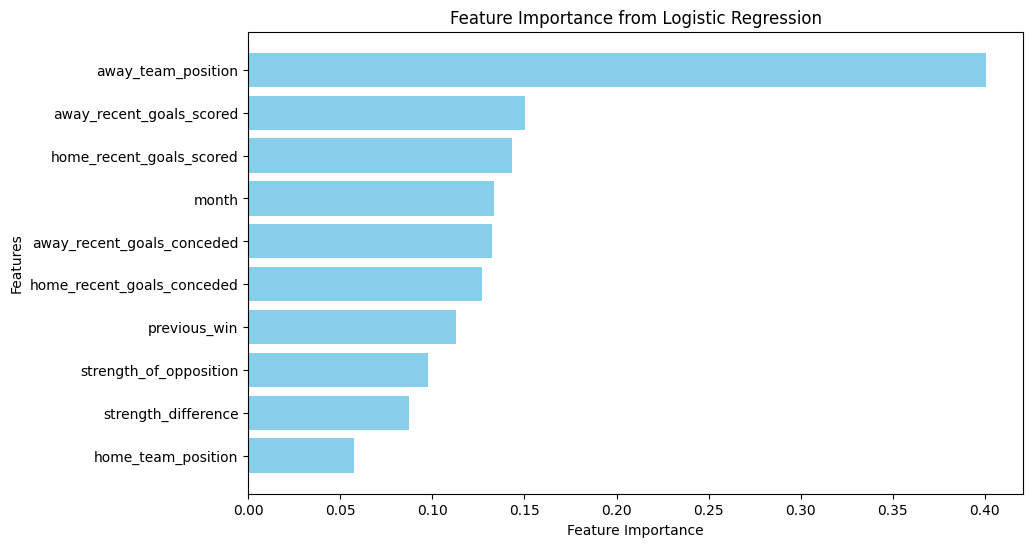

In [321]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(model, features):
  
    coefficients = model.coef_[0]  
    feature_importance = np.abs(coefficients)  
    feature_importance, features = zip(*sorted(zip(feature_importance, features), reverse=True)) 

    
    plt.figure(figsize=(10, 6))
    plt.barh(features, feature_importance, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance from Logistic Regression')
    plt.gca().invert_yaxis() 
    plt.show()

print("\nFeature Importance for n=5:")
plot_feature_importance(log_reg_model_n5, [
    'home_recent_goals_scored', 'home_recent_goals_conceded',
    'away_recent_goals_scored', 'away_recent_goals_conceded',
    'previous_win', 'home_team_position', 
    'away_team_position', 'strength_difference', 'month', 'strength_of_opposition'
])


In [232]:
#KNN 

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


def run_knn(df, n):

    features = [
        'home_recent_goals_scored_n10',  
        'home_recent_goals_conceded_n10',  
        'away_recent_goals_scored_n10', 
        'away_recent_goals_conceded_n10', 
        'home_prev_season_goals_scored',  
        'home_prev_season_goals_conceded', 
        'away_prev_season_goals_scored',  
        'away_prev_season_goals_conceded',
        'home_prev_season_position',  
        'away_prev_season_position', 
        'home_team_pi_rating', 
        'away_team_pi_rating',
        'strength_of_opposition', 
        'strength_difference',  
        'previous_win', 
        'home_team_position', 
        'away_team_position', 
        'month'  
    ]

    X = df[features]
    y = df['winner']

    X = X.dropna()
    y = y.loc[X.index] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # K-NN model
    knn = KNeighborsClassifier()

    param_grid = {'n_neighbors': [3, 5, 7, 10]}

    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k for n={n}: {best_k}")

    best_knn_model = grid_search.best_estimator_

    y_pred = best_knn_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for n={n}: {accuracy:.2f}")

    print(f"Classification Report for n={n}:\n", classification_report(y_test, y_pred))

    cv_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=5)
    print(f"Cross-validated accuracy for n={n}: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

    return best_knn_model


In [233]:
# Run the k-NN model for different n values
print("\nResults for k-NN, n=10:")
knn_model_n10 = run_knn(df_bundesliga_recencyfeatures.copy(), 10)



Results for k-NN, n=10:
Best k for n=10: 10
Accuracy for n=10: 0.57
Classification Report for n=10:
               precision    recall  f1-score   support

           0       0.63      0.83      0.72      1845
           1       0.33      0.18      0.24       968
           2       0.53      0.44      0.48       909

    accuracy                           0.57      3722
   macro avg       0.50      0.48      0.48      3722
weighted avg       0.53      0.57      0.53      3722

Cross-validated accuracy for n=10: 0.56 ± 0.01


In [234]:
#Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier

def run_gradient_boosting(df, n):

    features = [
        'home_recent_goals_scored_n10', 
        'home_recent_goals_conceded_n10',
        'away_recent_goals_scored_n10',  
        'away_recent_goals_conceded_n10',
        'home_prev_season_goals_scored',  
        'home_prev_season_goals_conceded', 
        'away_prev_season_goals_scored',  
        'away_prev_season_goals_conceded', 
        'home_prev_season_position',  
        'away_prev_season_position',  
        'home_team_pi_rating',  
        'away_team_pi_rating',
        'strength_of_opposition', 
        'strength_difference',  
        'previous_win',  
        'home_team_position', 
        'away_team_position',  
        'month'  
    ]

    X = df[features]
    y = df['winner'] 

    X = X.dropna()
    y = y.loc[X.index] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # GBDT model 
    gbdt = GradientBoostingClassifier(random_state=42)

    param_grid = {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3],
        'subsample': [0.8],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    }

    grid_search = GridSearchCV(gbdt, param_grid, cv=5, scoring='accuracy')

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    print(f"Best Parameters for n={n}: {best_params}")

    best_gbdt_model = grid_search.best_estimator_

    y_pred = best_gbdt_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for n={n}: {accuracy:.2f}")

    print(f"Classification Report for n={n}:\n", classification_report(y_test, y_pred))

    cv_scores = cross_val_score(best_gbdt_model, X_train, y_train, cv=5)
    print(f"Cross-validated accuracy for n={n}: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

    return best_gbdt_model

In [235]:
gbdt_model_n9 = run_gradient_boosting(df_bundesliga_recencyfeatures.copy(), 10)

Best Parameters for n=10: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Accuracy for n=10: 0.61
Classification Report for n=10:
               precision    recall  f1-score   support

           0       0.65      0.88      0.75      1845
           1       0.39      0.11      0.17       968
           2       0.56      0.58      0.57       909

    accuracy                           0.61      3722
   macro avg       0.53      0.53      0.50      3722
weighted avg       0.56      0.61      0.56      3722

Cross-validated accuracy for n=10: 0.61 ± 0.01


Calculate RPS Score 

In [236]:
def calculate_rps(y_true, y_prob):
    rps = 0.0
    num_classes = y_prob.shape[1]  # Number of classes
    for i in range(len(y_true)):
        true_class = int(y_true[i])
        
        # Ensure true_class is a valid index
        if true_class >= num_classes:
            raise ValueError(f"True class index {true_class} is out of range for the number of classes {num_classes}")

        # Cumulative probabilities
        cumulative_prob = np.cumsum(y_prob[i])

        # Cumulative true distribution
        cumulative_true = np.zeros(num_classes)
        cumulative_true[true_class] = 1
        cumulative_true = np.cumsum(cumulative_true)

        # Calculate RPS for this instance
        rps += np.sum((cumulative_prob - cumulative_true) ** 2) / (num_classes - 1)

    return rps / len(y_true)



In [322]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


def run_xgboost_model_reduced(df, n):


    features = [
        'home_recent_goals_scored_n10',  
        'home_recent_goals_conceded_n10',  
        'away_recent_goals_scored_n10',  
        'away_recent_goals_conceded_n10',  
        'home_prev_season_goals_scored',  
        'home_prev_season_goals_conceded', 
        'away_prev_season_goals_scored', 
        'away_prev_season_goals_conceded', 
        'home_prev_season_position',  
        'away_prev_season_position',  
        'home_team_pi_rating',  
        'away_team_pi_rating',
        'strength_of_opposition', 
        'strength_difference',  
        'previous_win',  
        'home_team_position',  
        'away_team_position',  
        'month', 
        'head_to_head_home_goals_scored', 
        'head_to_head_away_goals_scored',
        'head_to_head_home_wins', 
        'head_to_head_away_wins',
        'head_to_head_draws'
    ]

    if not all(feature in df.columns for feature in features):
        raise ValueError(f"One or more of the required features are missing in the DataFrame. Available columns are: {df.columns.tolist()}")

    X = df[features]
    y = df['winner']

    X = X.dropna()
    y = y.loc[X.index] 

    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    class_names = [f"Class {i}" for i in range(len(np.unique(y)))]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # XGBoost model
    model = xgb.XGBClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1.0,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    log_loss_value = log_loss(y_test, y_prob)
    rps_value = calculate_rps(y_test, y_prob)
    
    print(f"Accuracy for n={n}: {accuracy:.2f}")
    print(f"Log Loss for n={n}: {log_loss_value:.4f}")
    print(f"Ranked Probability Score (RPS) for n={n}: {rps_value:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    return model, label_encoder


In [323]:
model = run_xgboost_model_reduced(df_bundesliga_recencyfeatures, n=10)

/Users/nilsweigeldt/.pyenv/versions/3.11.3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[14:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy for n=10: 0.63
Log Loss for n=10: 0.8290
Ranked Probability Score (RPS) for n=10: 0.1540

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.67      0.87      0.76      1845
     Class 1       0.45      0.19      0.27       968
     Class 2       0.59      0.59      0.59       909

    accuracy                           0.63      3722
   macro avg       0.57      0.55      0.54      3722
weighted avg       0.59      0.63      0.59      3722



Predict Winner for next season

In [324]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Function to prepare the first matchday features
def prepare_first_matchday_features(df, first_matchday):
    features = [
        'home_recent_goals_scored_n10',  
        'home_recent_goals_conceded_n10',  
        'away_recent_goals_scored_n10',  
        'away_recent_goals_conceded_n10',  
        'home_prev_season_goals_scored',  
        'home_prev_season_goals_conceded', 
        'away_prev_season_goals_scored', 
        'away_prev_season_goals_conceded', 
        'home_prev_season_position',  
        'away_prev_season_position',  
        'home_team_pi_rating',  
        'away_team_pi_rating',
        'strength_of_opposition', 
        'strength_difference',  
        'previous_win',  
        'home_team_position',  
        'away_team_position',  
        'month', 
        'head_to_head_home_goals_scored', 
        'head_to_head_away_goals_scored',
        'head_to_head_home_wins', 
        'head_to_head_away_wins',
        'head_to_head_draws'
    ]
    
    first_matchday_features = pd.DataFrame(columns=features)
    valid_matches = []  # To keep track of matches with valid data
    
    for _, match in first_matchday.iterrows():
        home_team = match['home_team']
        away_team = match['away_team']
        
        last_season = df[df['season_start_year'] == match['season_start_year'] - 1]
        
        if last_season[last_season['home_team'] == home_team].empty or last_season[last_season['away_team'] == away_team].empty:
            print(f"Data missing for either {home_team} or {away_team} in the previous season. Skipping match.")
            continue

        # Extract last 10 matches for recent goals scored/conceded
        home_stats = last_season[last_season['home_team'] == home_team].iloc[-10:]
        away_stats = last_season[last_season['away_team'] == away_team].iloc[-10:]
        
        if home_stats.empty or away_stats.empty:
            print(f"Insufficient data for {home_team} or {away_team} in the last 10 games of the previous season.")
            continue

        # Extract head-to-head statistics
        head_to_head_stats = df[((df['home_team'] == home_team) & (df['away_team'] == away_team)) |
                                ((df['home_team'] == away_team) & (df['away_team'] == home_team))]
        
        head_to_head_home_goals = head_to_head_stats['home_goals'].sum()
        head_to_head_away_goals = head_to_head_stats['away_goals'].sum()
        head_to_head_home_wins = ((head_to_head_stats['home_team'] == home_team) & (head_to_head_stats['winner'] == 0)).sum()
        head_to_head_away_wins = ((head_to_head_stats['away_team'] == away_team) & (head_to_head_stats['winner'] == 2)).sum()
        head_to_head_draws = (head_to_head_stats['winner'] == 1).sum()

        feature_row = pd.DataFrame([{
            'home_recent_goals_scored_n10': home_stats['home_goals'].sum(),
            'home_recent_goals_conceded_n10': home_stats['away_goals'].sum(),
            'away_recent_goals_scored_n10': away_stats['away_goals'].sum(),
            'away_recent_goals_conceded_n10': away_stats['home_goals'].sum(),
            'home_prev_season_goals_scored': home_stats['home_goals'].sum(),
            'home_prev_season_goals_conceded': home_stats['away_goals'].sum(),
            'away_prev_season_goals_scored': away_stats['away_goals'].sum(),
            'away_prev_season_goals_conceded': away_stats['home_goals'].sum(),
            'home_prev_season_position': last_season[last_season['home_team'] == home_team]['home_team_position'].iloc[-1] if not last_season[last_season['home_team'] == home_team].empty else np.nan,
            'away_prev_season_position': last_season[last_season['away_team'] == away_team]['away_team_position'].iloc[-1] if not last_season[last_season['away_team'] == away_team].empty else np.nan,
            'home_team_pi_rating': last_season[last_season['home_team'] == home_team]['home_team_pi_rating'].iloc[-1] if not last_season[last_season['home_team'] == home_team].empty else np.nan,
            'away_team_pi_rating': last_season[last_season['away_team'] == away_team]['away_team_pi_rating'].iloc[-1] if not last_season[last_season['away_team'] == away_team].empty else np.nan,
            'strength_of_opposition': last_season[last_season['away_team'] == away_team]['strength_of_opposition'].iloc[-1] if not last_season[last_season['away_team'] == away_team].empty else np.nan,
            'strength_difference': last_season[last_season['home_team'] == home_team]['strength_difference'].iloc[-1] if not last_season[last_season['home_team'] == home_team].empty else np.nan,
            'previous_win': last_season[last_season['home_team'] == home_team]['previous_win'].iloc[-1] if not last_season[last_season['home_team'] == home_team].empty else np.nan,
            'home_team_position': last_season[last_season['home_team'] == home_team]['home_team_position'].iloc[-1] if not last_season[last_season['home_team'] == home_team].empty else np.nan,
            'away_team_position': last_season[last_season['away_team'] == away_team]['away_team_position'].iloc[-1] if not last_season[last_season['away_team'] == away_team].empty else np.nan,
            'month': match['month'],
            'head_to_head_home_goals_scored': head_to_head_home_goals,
            'head_to_head_away_goals_scored': head_to_head_away_goals,
            'head_to_head_home_wins': head_to_head_home_wins,
            'head_to_head_away_wins': head_to_head_away_wins,
            'head_to_head_draws': head_to_head_draws
        }])
        
        first_matchday_features = pd.concat([first_matchday_features, feature_row], ignore_index=True)
        valid_matches.append(match)
    
    return first_matchday_features, pd.DataFrame(valid_matches)


In [325]:
first_matchday_data = {
    'home_team': ['Bor. Mönchengladbach', 'RB Leipzig', 'TSG 1899 Hoffenheim',
                  'SC Freiburg', 'FC Augsburg', '1. FSV Mainz 05', 
                  'Borussia Dortmund', 'VfL Wolfsburg', 'FC St. Pauli'],  # Home teams
    'away_team': ['Bayer 04 Leverkusen', 'VfL Bochum', 'Holstein Kiel',
                  'VfB Stuttgart', 'Werder Bremen', '1. FC Union Berlin', 
                  'Eintracht Frankfurt', 'Bayern München', '1. FC Heidenheim'],  # Away teams
    'season_start_year': [2024] * 9,
    'month': [8] * 9
}

# Convert to DataFrame
first_matchday_df = pd.DataFrame(first_matchday_data)

In [326]:
# Predict outcomes with probabilities
def predict_first_matchday_outcomes_with_probabilities(model, first_matchday_features):
 
    scaler = StandardScaler()
    first_matchday_features_scaled = scaler.fit_transform(first_matchday_features)
    

    predictions = model.predict(first_matchday_features_scaled)
    prediction_probabilities = model.predict_proba(first_matchday_features_scaled)
    
    return predictions, prediction_probabilities





In [327]:

trained_model, fitted_label_encoder = run_xgboost_model_reduced(df_bundesliga_recencyfeatures, n=10)

# Prepare the first matchday data and get valid matches
first_matchday_features, valid_first_matchday_df = prepare_first_matchday_features(df_bundesliga_recencyfeatures, first_matchday_df)

# Predict outcomes for the valid matches
predicted_winners, predicted_probabilities = predict_first_matchday_outcomes_with_probabilities(trained_model, first_matchday_features)

valid_first_matchday_df['predicted_winner'] = predicted_winners
valid_first_matchday_df['home_win_prob'] = predicted_probabilities[:, 0]
valid_first_matchday_df['draw_prob'] = predicted_probabilities[:, 1]
valid_first_matchday_df['away_win_prob'] = predicted_probabilities[:, 2]

valid_first_matchday_df



/Users/nilsweigeldt/.pyenv/versions/3.11.3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[14:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy for n=10: 0.63
Log Loss for n=10: 0.8290
Ranked Probability Score (RPS) for n=10: 0.1540

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.67      0.87      0.76      1845
     Class 1       0.45      0.19      0.27       968
     Class 2       0.59      0.59      0.59       909

    accuracy                           0.63      3722
   macro avg       0.57      0.55      0.54      3722
weighted avg       0.59      0.63      0.59      3722

Data missing for either TSG 1899 Hoffenheim or Holstein Kiel in the previous season. Skipping match.
Data missing for either FC St. Pauli or 1. FC Heidenheim in the previous season. Skipping match.


,home_team,away_team,season_start_year,month,predicted_winner,home_win_prob,draw_prob,away_win_prob
0,Bor. Mönchengladbach,Bayer 04 Leverkusen,2024,8,2,0.227892,0.352290,0.419817
1,RB Leipzig,VfL Bochum,2024,8,0,0.726080,0.144885,0.129035
3,SC Freiburg,VfB Stuttgart,2024,8,2,0.392675,0.195905,0.411421
4,FC Augsburg,Werder Bremen,2024,8,0,0.836238,0.099315,0.064447
5,1. FSV Mainz 05,1. FC Union Berlin,2024,8,1,0.322539,0.379115,0.298346
6,Borussia Dortmund,Eintracht Frankfurt,2024,8,0,0.552700,0.224284,0.223016
7,VfL Wolfsburg,Bayern München,2024,8,0,0.470913,0.173476,0.355612


Regression Model 

In [328]:
def calculate_accuracy(y_true_home, y_pred_home, y_true_away, y_pred_away):
    # Round the predictions to the nearest integer
    y_pred_home_rounded = np.round(y_pred_home)
    y_pred_away_rounded = np.round(y_pred_away)

    # Calculate the number of matches where both home and away goals were predicted correctly
    correct_predictions = np.sum((y_true_home == y_pred_home_rounded) & (y_true_away == y_pred_away_rounded))
    
    # Calculate the accuracy as a percentage
    total_matches = len(y_true_home)
    accuracy = (correct_predictions / total_matches) * 100
    
    return accuracy

In [333]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Function to train the regression model for predicting exact scores
def run_xgboost_regression_model(df, n):
    features = [
        'home_recent_goals_scored_n10',  
        'home_recent_goals_conceded_n10',  
        'away_recent_goals_scored_n10',  
        'away_recent_goals_conceded_n10',  
        'home_prev_season_goals_scored',  
        'home_prev_season_goals_conceded', 
        'away_prev_season_goals_scored', 
        'away_prev_season_goals_conceded', 
        'home_prev_season_position',  
        'away_prev_season_position',  
        'home_team_pi_rating',  
        'away_team_pi_rating',
        'strength_of_opposition', 
        'strength_difference',  
        'previous_win',  
        'home_team_position',  
        'away_team_position',  
        'month', 
        'head_to_head_home_goals_scored', 
        'head_to_head_away_goals_scored',
        'head_to_head_home_wins', 
        'head_to_head_away_wins',
        'head_to_head_draws' 
    ]

    if not all(feature in df.columns for feature in features):
        raise ValueError(f"One or more of the required features are missing in the DataFrame. Available columns are: {df.columns.tolist()}")

    X = df[features]
    y_home = df['home_goals']  
    y_away = df['away_goals']  

    X = X.dropna()
    y_home = y_home.loc[X.index] 
    y_away = y_away.loc[X.index] 

    X = X.reset_index(drop=True)
    y_home = y_home.reset_index(drop=True)
    y_away = y_away.reset_index(drop=True)

    X_train, X_test, y_train_home, y_test_home, y_train_away, y_test_away = train_test_split(X, y_home, y_away, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

   
    model_home = xgb.XGBRegressor(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1.0,
        random_state=42
    )
    
    model_away = xgb.XGBRegressor(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1.0,
        random_state=42
    )
    
    # Train the models
    model_home.fit(X_train_scaled, y_train_home)
    model_away.fit(X_train_scaled, y_train_away)

    y_pred_home = model_home.predict(X_test_scaled)
    y_pred_away = model_away.predict(X_test_scaled)

    mse_home = mean_squared_error(y_test_home, y_pred_home)
    mse_away = mean_squared_error(y_test_away, y_pred_away)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse_home = np.sqrt(mse_home)
    rmse_away = np.sqrt(mse_away)


    print(f"Root Mean Squared Error for Home Goals: {rmse_home:.4f}")
    print(f"Root Mean Squared Error for Away Goals: {rmse_away:.4f}")   

#Calculate the accuracy of the exact score predictions
    accuracy = calculate_accuracy(y_test_home, y_pred_home, y_test_away, y_pred_away)
    print(f"Accuracy of exact score predictions: {accuracy:.2f}%")

    return model_home, model_away, scaler


In [334]:
# Function to predict the exact scores for the first matchday
def predict_first_matchday_scores(model_home, model_away, first_matchday_features, scaler):
    first_matchday_features_scaled = scaler.transform(first_matchday_features)
    
    predicted_home_goals = model_home.predict(first_matchday_features_scaled)
    predicted_away_goals = model_away.predict(first_matchday_features_scaled)
    
    # Round the predictions to whole numbers
    predicted_home_goals = np.round(predicted_home_goals,1)
    predicted_away_goals = np.round(predicted_away_goals,1)
    
    return predicted_home_goals, predicted_away_goals

# Run the regression model
model_home, model_away, scaler = run_xgboost_regression_model(df_bundesliga_recencyfeatures, n=10)

# Predict exact scores for the first matchday
predicted_home_goals, predicted_away_goals = predict_first_matchday_scores(model_home, model_away, first_matchday_features, scaler)

# Add predictions to the DataFrame
valid_first_matchday_df['predicted_home_goals'] = predicted_home_goals
valid_first_matchday_df['predicted_away_goals'] = predicted_away_goals

# Display the results
valid_first_matchday_df

Root Mean Squared Error for Home Goals: 1.2960
Root Mean Squared Error for Away Goals: 1.0846
Accuracy of exact score predictions: 12.06%


,home_team,away_team,season_start_year,month,predicted_winner,home_win_prob,draw_prob,away_win_prob,predicted_home_goals,predicted_away_goals
0,Bor. Mönchengladbach,Bayer 04 Leverkusen,2024,8,2,0.227892,0.352290,0.419817,1.8,3.1
1,RB Leipzig,VfL Bochum,2024,8,0,0.726080,0.144885,0.129035,2.0,1.0
3,SC Freiburg,VfB Stuttgart,2024,8,0,0.392675,0.195905,0.411421,2.8,2.2
4,FC Augsburg,Werder Bremen,2024,8,0,0.836238,0.099315,0.064447,3.3,1.5
5,1. FSV Mainz 05,1. FC Union Berlin,2024,8,1,0.322539,0.379115,0.298346,1.5,1.8
6,Borussia Dortmund,Eintracht Frankfurt,2024,8,0,0.552700,0.224284,0.223016,1.8,1.7
7,VfL Wolfsburg,Bayern München,2024,8,0,0.470913,0.173476,0.355612,1.8,1.7


In [332]:
# Post-processing to adjust for consistency
for idx, row in valid_first_matchday_df.iterrows():
    if row['predicted_home_goals'] < row['predicted_away_goals'] and row['predicted_winner'] == 0:
        valid_first_matchday_df.at[idx, 'predicted_winner'] = 2  # Change to away win
    elif row['predicted_home_goals'] > row['predicted_away_goals'] and row['predicted_winner'] == 2:
        valid_first_matchday_df.at[idx, 'predicted_winner'] = 0  # Change to home win
    elif row['predicted_home_goals'] == row['predicted_away_goals']:
        valid_first_matchday_df.at[idx, 'predicted_winner'] = 1  # Change to draw

# Display the updated results
valid_first_matchday_df


,home_team,away_team,season_start_year,month,predicted_winner,home_win_prob,draw_prob,away_win_prob,predicted_home_goals,predicted_away_goals
0,Bor. Mönchengladbach,Bayer 04 Leverkusen,2024,8,2,0.227892,0.352290,0.419817,1.8,3.1
1,RB Leipzig,VfL Bochum,2024,8,0,0.726080,0.144885,0.129035,2.0,1.0
3,SC Freiburg,VfB Stuttgart,2024,8,0,0.392675,0.195905,0.411421,2.8,2.2
4,FC Augsburg,Werder Bremen,2024,8,0,0.836238,0.099315,0.064447,3.3,1.5
5,1. FSV Mainz 05,1. FC Union Berlin,2024,8,1,0.322539,0.379115,0.298346,1.5,1.8
6,Borussia Dortmund,Eintracht Frankfurt,2024,8,0,0.552700,0.224284,0.223016,1.8,1.7
7,VfL Wolfsburg,Bayern München,2024,8,0,0.470913,0.173476,0.355612,1.8,1.7


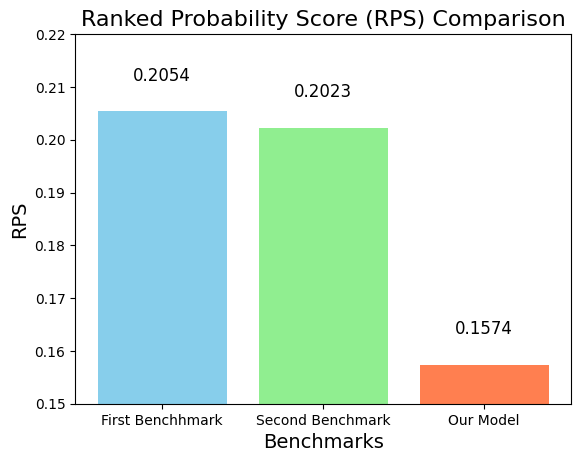

In [297]:
import matplotlib.pyplot as plt

# Data for the plot
models = ['First Benchhmark', 'Second Benchmark', 'Our Model']
rps_scores = [0.2054, 0.2023, 0.1574]

# Create the plot
fig, ax = plt.subplots()

# Plot the bars
bars = ax.bar(models, rps_scores, color=['skyblue', 'lightgreen', 'coral'])

# Add text annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom', fontsize=12)

# Add title and labels
ax.set_title('Ranked Probability Score (RPS) Comparison', fontsize=16)
ax.set_ylabel('RPS', fontsize=14)
ax.set_xlabel('Benchmarks', fontsize=14)
ax.set_ylim(0.15, 0.22)  # Set the y-axis limits for better comparison

# Display the plot
plt.show()



